In [4]:
import pandas as pd

df = pd.read_csv ('https://s3.amazonaws.com/automl-example/produtos.csv',sep=';')

In [35]:
df.head()

,nome,descricao,categoria,todos
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
nome         4080 non-null object
descricao    2916 non-null object
categoria    4080 non-null object
dtypes: object(3)
memory usage: 95.7+ KB


In [12]:
#percentual de valores null
df.isna().sum() / len(df) 

nome         0.000000
descricao    0.285294
categoria    0.000000
todos        0.285294
dtype: float64

In [13]:
#removendo nulos
df.dropna(inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 4 columns):
nome         2916 non-null object
descricao    2916 non-null object
categoria    2916 non-null object
todos        2916 non-null object
dtypes: object(4)
memory usage: 113.9+ KB


In [5]:
#distribuição da categoria

#df.groupby('categoria').count()
df.categoria.value_counts()

livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

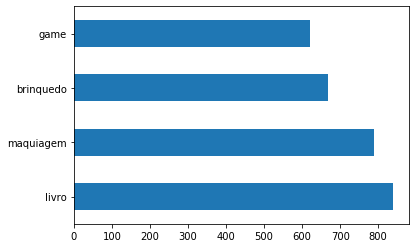

In [46]:
df.categoria.value_counts().plot(kind='barh')

In [45]:
#top 10 palavras que mais ocorrem 
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


In [14]:
##top 10 da porra toda

df['todos'] =  df['nome'] + ' ' + df['descricao']

palavras = pd.Series(' '.join(df['todos']).lower().split()).value_counts()[:10]
palavras

de      24300
e       16042
o       12424
a       12152
do       8791
para     8032
-        7413
em       6900
que      6797
com      6247
dtype: int64

In [15]:
from collections import Counter

c = Counter()

df.descricao.str.lower().str.split(' ').apply(c.update)
c.most_common(12)


[('de', 23835),
 ('e', 15774),
 ('o', 12238),
 ('a', 11905),
 ('do', 8657),
 ('para', 7913),
 ('em', 6798),
 ('que', 6770),
 ('-', 6220),
 ('com', 6099),
 ('da', 5216),
 ('é', 4426)]

In [13]:
c.get('livro')

545

In [16]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1,1))
vec.fit(df.todos)

texto = vec.transform(df.todos)

#print(pd.DataFrame(texto, columns= get_feature_names()))

In [21]:
texto

<2916x35466 sparse matrix of type '<class 'numpy.int64'>'
	with 324388 stored elements in Compressed Sparse Row format>